# Problem statement
Our client is a credit card company. They have brought us a dataset that includes some demographics and recent financial data (the past six months) for a sample of 30,000 of their account holders. This data is at the credit account level; in other words, there is one row for each account (you should always clarify what the definition of a row is, in a dataset). Rows are labeled by whether in the next month after the six month historical data period, an account owner has defaulted, or in other words, failed to make the minimum payment.

In [2]:
import pandas as pd
import numpy as np

In [3]:
s=pd.read_excel('Data set/default.xls')

In [4]:
s.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# EDA
1. Brief Look at the Dataset
2. See the dataset shape.
3. Target Distribution.
4. See the variables datatypes.
5. See the number of missing/null values.
6. See the number of unique values in each variable. 

In [5]:
s.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Q)How many columns and rows are there in data?**

In [6]:
s.shape

(30000, 25)

### Dataset Shape (Number of Samples and Variables in the dataset)

In [7]:
print(f'\nDataset contains {s.shape[0]} samples and {s.shape[1]} variables')


Dataset contains 30000 samples and 25 variables


30000 rows and 25 columns

**Q)What kind of features are there? Which are categorical and which are numerical?**

In [8]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

ID and PAY_1 are categorical type rest are continuous.

*features, responses or metadata*

In [9]:
#target distribution
ID_COL,TARGET_COL='ID','default payment next month'

### Target Distribution

In [10]:
s[TARGET_COL].value_counts(normalize=True)

0    0.781267
1    0.218733
Name: default payment next month, dtype: float64

Default payment rate is low.

### Visualisation

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

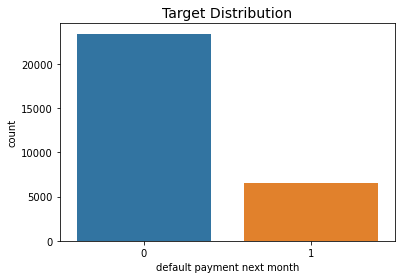

In [12]:
_=sns.countplot(s[TARGET_COL])
_=plt.title("Target Distribution",fontsize=14)

**Q)Is there any missing data?**

In [13]:
null_values_per_variable=100*(s.isnull().sum()/s.shape[0]).round(3)
null_values_per_variable.sort_values(ascending=False)

default payment next month    0.0
PAY_6                         0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_1                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
BILL_AMT1                     0.0
PAY_AMT6                      0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
ID                            0.0
dtype: float64

Great we don't have any null volume.

**Unique values in each variable**

In [14]:
s.nunique()

ID                            29687
LIMIT_BAL                        82
SEX                               3
EDUCATION                         7
MARRIAGE                          4
AGE                              57
PAY_1                            12
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22510
BILL_AMT2                     22146
BILL_AMT3                     21822
BILL_AMT4                     21350
BILL_AMT5                     20831
BILL_AMT6                     20417
PAY_AMT1                       7890
PAY_AMT2                       7847
PAY_AMT3                       7463
PAY_AMT4                       6901
PAY_AMT5                       6857
PAY_AMT6                       6895
default payment next month        2
dtype: int64

## Verifying Basic Data Integrity

In [16]:
s.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## Data set description

1) LIMIT_BAL: Amount of the credit provided (in New Taiwanese (NT) dollar) including individual consumer credit and the family (supplementary) credit.

2) SEX: Gender (1 = male; 2 = female).

3) EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

4) MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

5) AGE: Age (year).

6) PAY_1–Pay_6: A record of past payments. Past monthly payments, recorded from April to September, are stored in these columns.PAY_1 represents the repayment status in September; PAY_2 = repayment status in August; and so on up to PAY_6, which represents the repayment status in April.-1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; and so on up to 8 = payment delay for eight months; 9 = payment delay for nine months and above.

7) BILL_AMT1–BILL_AMT6: Bill statement amount (in NT dollar).BILL_AMT1 represents the bill statement amount in September; BILL_AMT2 represents the bill statement amount in August; and so on up to BILL_AMT7, which represents the bill statement amount in April.

8) PAY_AMT1–PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 represents the amount paid in September; PAY_AMT2 represents the amount paid in August; and so on up to PAY_AMT6, which represents the amount paid in April.



In [17]:
s.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
s['ID'].nunique()

29687

In [19]:
s.shape

(30000, 25)

In [20]:
id_counts=s['ID'].value_counts()
id_counts.head()

a9870d3e-b4d1    2
f86688f1-8742    2
c9826d63-f7d3    2
73ea498f-44b2    2
0a8272b2-78aa    2
Name: ID, dtype: int64

In [22]:
id_counts.head(10)

a9870d3e-b4d1    2
f86688f1-8742    2
c9826d63-f7d3    2
73ea498f-44b2    2
0a8272b2-78aa    2
d5905747-8aef    2
40e75290-0f59    2
93b2c5f7-acea    2
1bf3b4eb-d759    2
7fe414ae-32f8    2
Name: ID, dtype: int64

In [21]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

# Boolean Masks
 logical mask, also known as a Boolean mask. A logical mask is a way to filter an array, or series, by some condition.

In [23]:
import numpy as np

In [24]:
random_integers=np.random.randint(low=1,high=5,size=100)

In [25]:
random_integers[:5]

array([1, 1, 4, 1, 3])

In [26]:
is_equal_to_3=random_integers==3

In [28]:
is_equal_to_3[:5]

array([False, False, False, False,  True])

In [29]:
sum(is_equal_to_3)

20

In [31]:
sum(random_integers[is_equal_to_3])

60

In [32]:
dupe_mask=id_counts==2
dupe_mask[0:5]

a9870d3e-b4d1    True
f86688f1-8742    True
c9826d63-f7d3    True
73ea498f-44b2    True
0a8272b2-78aa    True
Name: ID, dtype: bool

In [33]:
dupe_ids=id_counts.index[dupe_mask]

In [34]:
dupe_ids=list(dupe_ids)
len(dupe_ids)

313

In [35]:
dupe_ids[0:5]

['a9870d3e-b4d1',
 'f86688f1-8742',
 'c9826d63-f7d3',
 '73ea498f-44b2',
 '0a8272b2-78aa']

In [37]:
s.loc[s['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
7293,f86688f1-8742,100000,2,2,1,27,-2,-2,-2,-2,...,0,0,0,4780,0,0,0,0,0,0
7393,f86688f1-8742,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12166,c9826d63-f7d3,80000,2,1,2,28,0,0,0,0,...,62818,45413,44793,3525,10000,7296,3000,3000,4500,0
12266,c9826d63-f7d3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29369,a9870d3e-b4d1,320000,1,2,2,28,0,-1,-1,2,...,74838,72402,71847,70891,7001,21,3012,3015,2713,0
29469,a9870d3e-b4d1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Boolean Matrix

df_zero_mask=s==0

In [40]:
feature_zero_mask=df_zero_mask.iloc[:,1:].all(axis=1)

In [41]:
sum(feature_zero_mask)

315

In [43]:
df_clean_1=s.loc[~feature_zero_mask,:].copy()

In [44]:
df_clean_1.shape

(29685, 25)

In [45]:
df_clean_1['ID'].nunique()

29685

# Exploring and Cleaning the Data

In [46]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [47]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [48]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [50]:
valid_pay_1_mask=df_clean_1['PAY_1']!='Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [51]:
sum(valid_pay_1_mask)

26664

In [52]:
df_clean_2=df_clean_1.loc[valid_pay_1_mask,:].copy()

In [53]:
df_clean_2.shape

(26664, 25)

In [54]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [55]:
df_clean_2['PAY_1']=df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1','PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


-2 means the account started that month with a zero balance, and never used any credit
-1 means the account had a balance that was paid in full
0 means that at least the minimum payment was made, but the entire balance wasn't paid (that is, a positive balance was carried to the next month)

# Data Quality Assurance and Exploration

1) credit limit and age features

2)  education and marriage 

3)  LIMIT_BAL and AGE


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl

mpl.rcParams['figure.dpi']=400

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD9DAD2A90>,
      dtype=object)

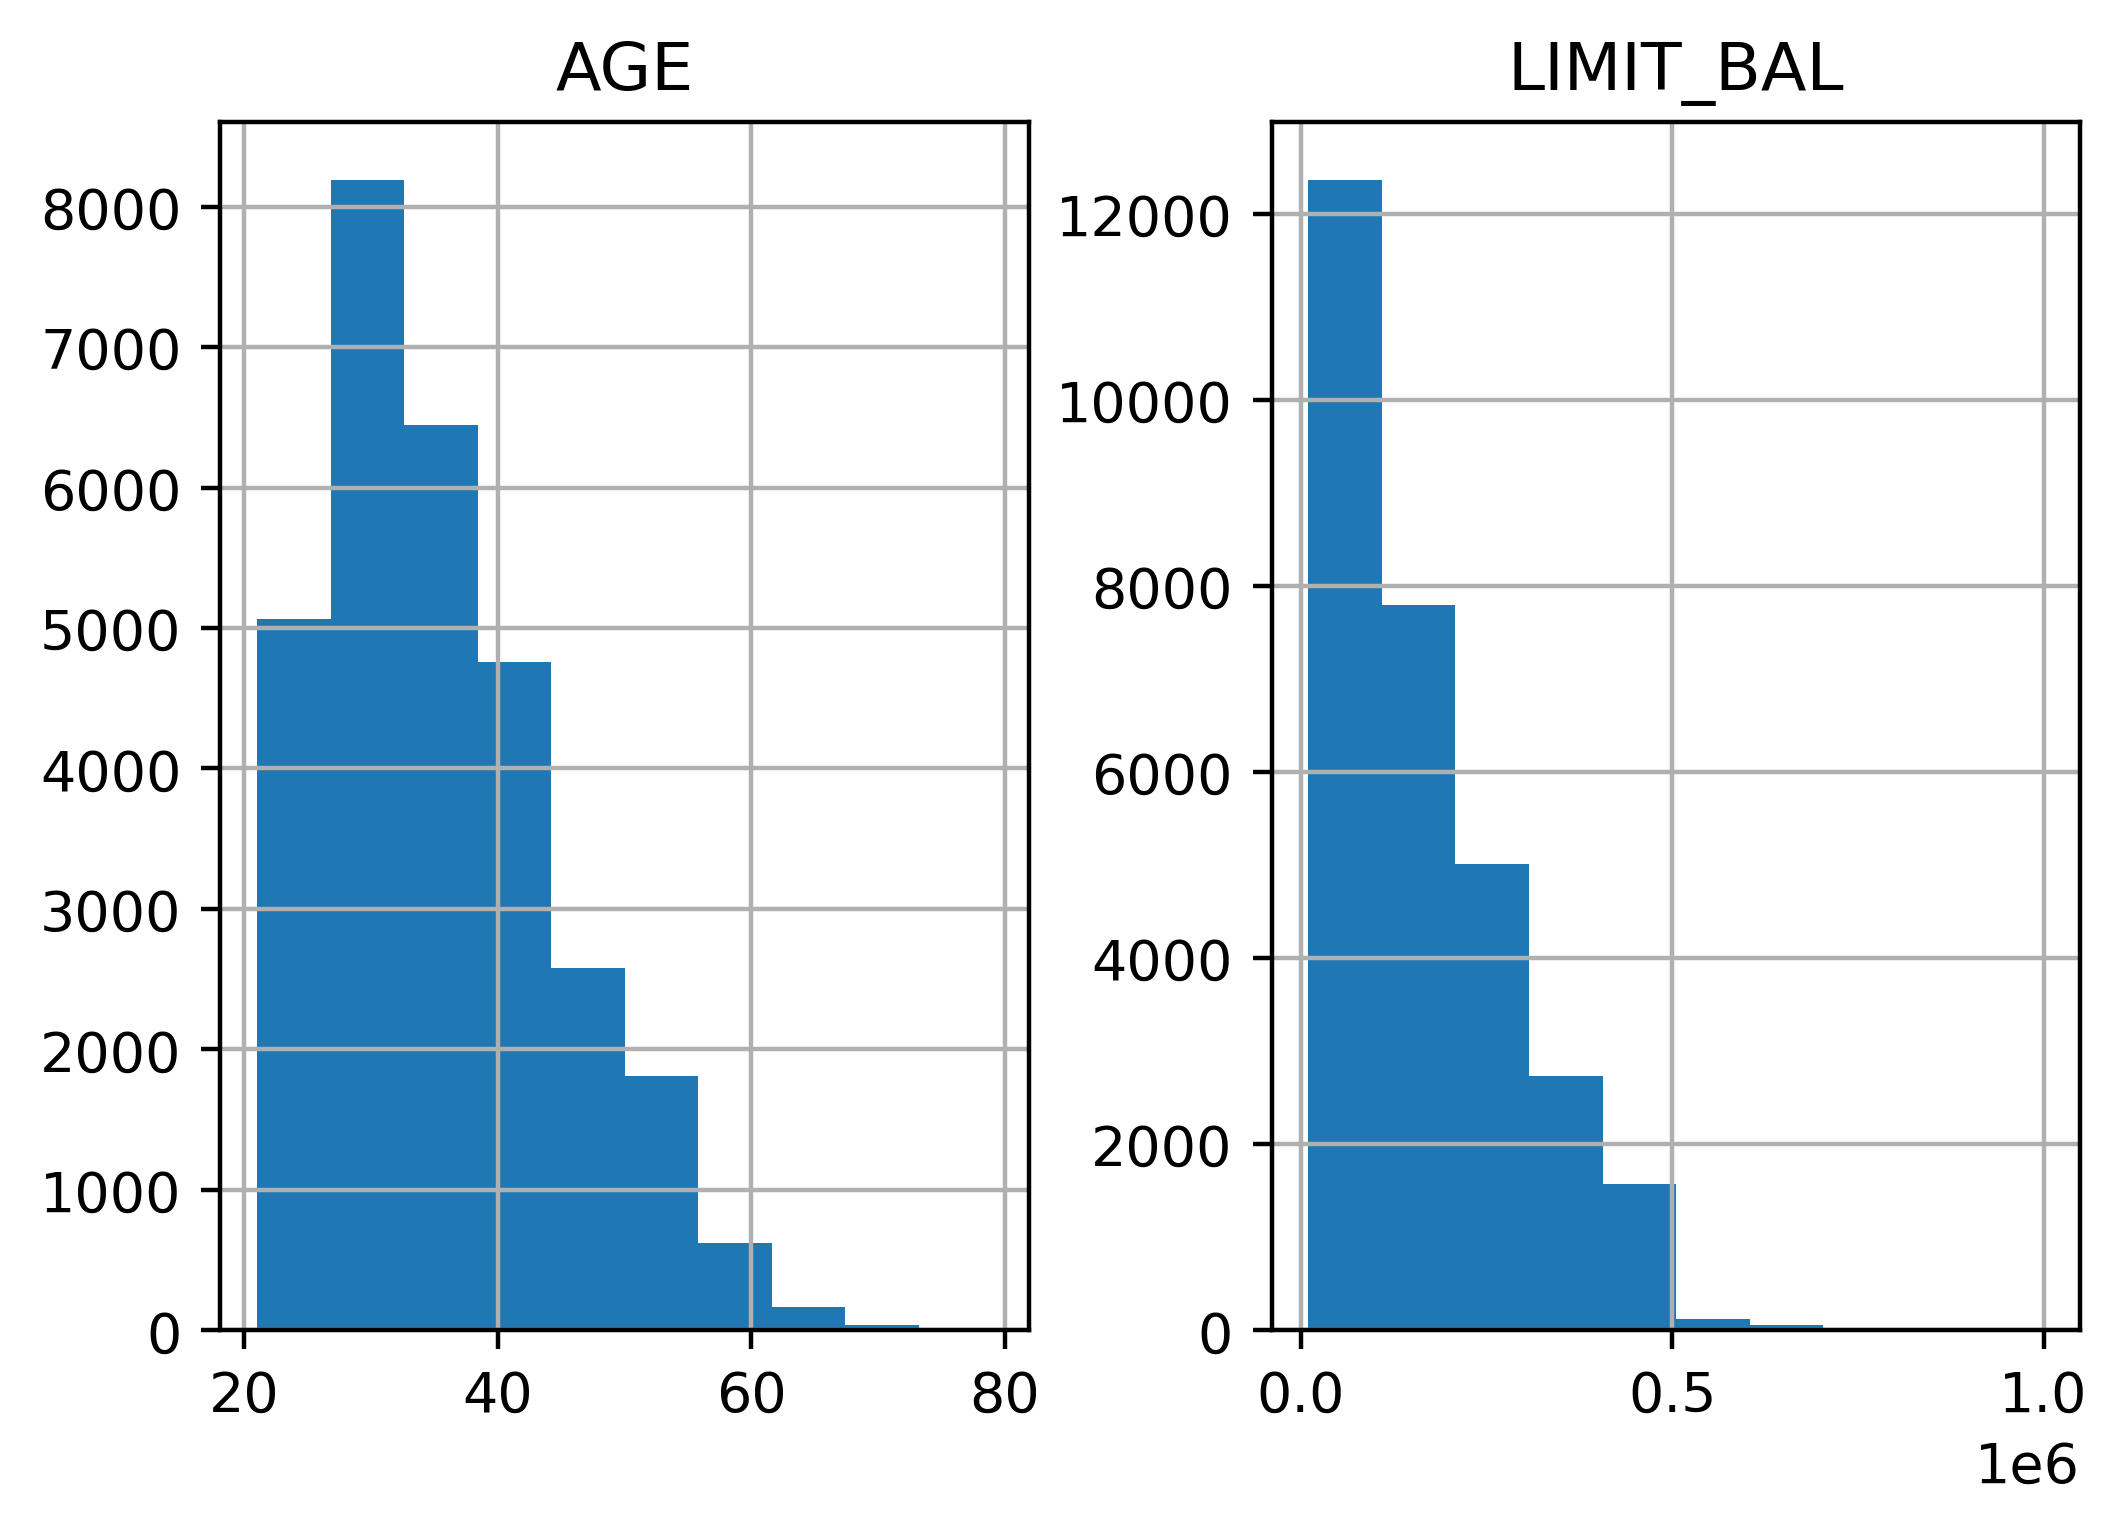

In [58]:
df_clean_1[['LIMIT_BAL','AGE']].hist()

In [59]:
df_clean_2[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [60]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [65]:
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6] ,value = 4,inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [66]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [67]:
df_clean_2['MARRIAGE'].replace(to_replace=[0],value=3,inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

# Deep Dive: Categorical Features


Text(0.5, 0, 'Education level: ordinal encoding')

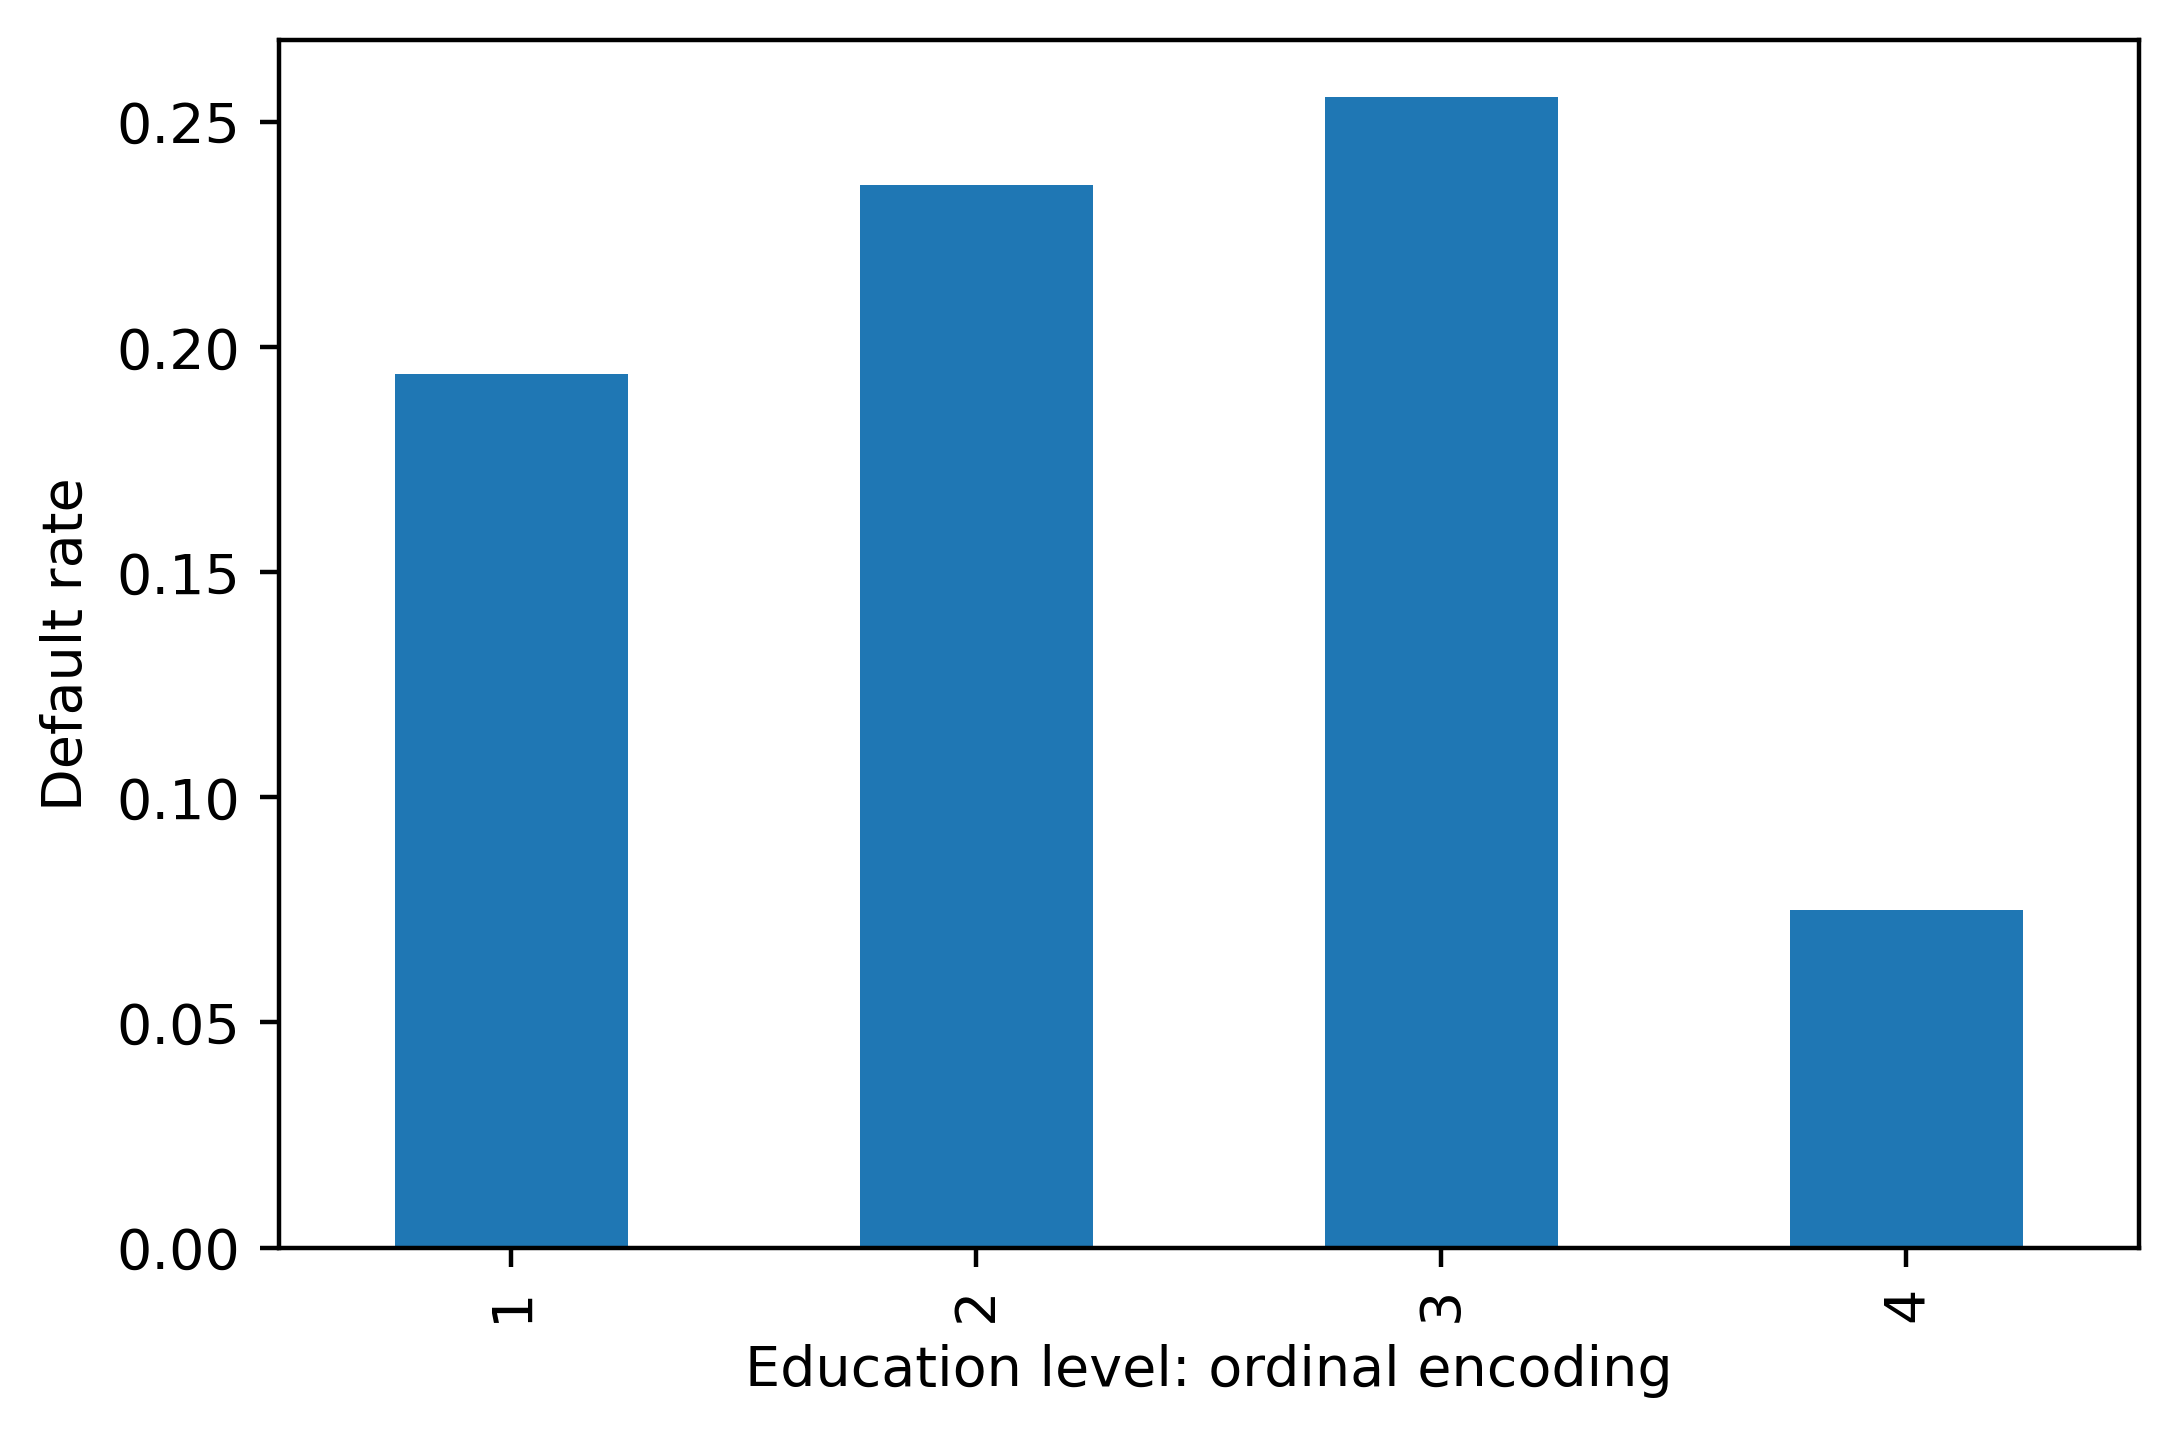

In [68]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

# ONE-HOT-ENCODING
OHE is a way to transform a categorical feature, which may consist of text labels in the raw data, into a numerical feature that can be used in mathematical models.

In [92]:
df_clean_2['EDUCATION_CAT']='none' #reverse engineering
df_clean_2['graduate school']='none'
df_clean_2['high school']='none'
df_clean_2['university']='none'
df_clean_2['others']='none'

In [93]:
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [94]:
cat_mapping = {
    1:"graduate school",
    2:"university",
    3:"high school",
    4:"others"
}

In [95]:
df_clean_2['EDUCATION_CAT']=df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [108]:
edu_ohe=pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)
edu_ohe=pd.get_dummies(df_clean_2['graduate school'])
edu_ohe=pd.get_dummies(df_clean_2['high school'])
edu_ohe=pd.get_dummies(df_clean_2['university'])
edu_ohe=pd.get_dummies(df_clean_2['others'])

In [98]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT','graduate school','high school','university','others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,none,none,none,none
1,university,none,none,none,none
2,university,none,none,none,none
3,university,none,none,none,none
4,university,none,none,none,none
5,graduate school,none,none,none,none
6,graduate school,none,none,none,none
7,university,none,none,none,none
8,high school,none,none,none,none
9,high school,none,none,none,none


In [104]:
df_with_ohe.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate_school,high_school,university,others,graduate school,high school,none
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,1,university,none,none,none,none,none,none,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,2000,1,university,none,none,none,none,none,none,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,5000,0,university,none,none,none,none,none,none,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1000,0,university,none,none,none,none,none,none,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,679,0,university,none,none,none,none,none,none,1
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,...,800,0,graduate school,none,none,none,none,none,none,1
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,...,13770,0,graduate school,none,none,none,none,none,none,1
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,...,1542,0,university,none,none,none,none,none,none,1
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,...,1000,0,high school,none,none,none,none,none,none,1
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,high school,none,none,none,none,none,none,1


In [107]:
df_with_ohe.drop(['graduate_school','high_school'],axis=1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,university,others,graduate school,high school,none
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,none,none,none,none,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,none,none,none,none,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,none,none,none,none,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,none,none,none,none,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,none,none,none,none,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,high school,none,none,none,none,1
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,high school,none,none,none,none,1
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,university,none,none,none,none,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,high school,none,none,none,none,1
